### Detablan, Arianne Deaniele D.
#### Implementing Linear Regression with Gradient Descent as Optimization Function
#### Homework 3
##### CMSC 197 - Machine Learning
##### github link <> 

In [609]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import statsmodels.api as sm

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import scale

### Load Advertising.csv dataset using pandas

In [611]:
### Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Standardize each column of the dataset 

In [613]:
std_df = scale(df)

std_df = pd.DataFrame(std_df, columns = df.columns)
std_df.head(5)

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [615]:
if 'bias' not in std_df.columns:
    std_df.insert(0, 'bias', 1)
std_df.head()

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683


In [617]:
x = std_df[['bias', 'TV', 'Radio', 'Newspaper']]
y = std_df['Sales']

print(x.head())
print(y.head())

   bias        TV     Radio  Newspaper
0     1  0.969852  0.981522   1.778945
1     1 -1.197376  1.082808   0.669579
2     1 -1.516155  1.528463   1.783549
3     1  0.052050  1.217855   1.286405
4     1  0.394182 -0.841614   1.281802
0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: Sales, dtype: float64


#### Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively.

In [619]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (170, 4)
y_train size: (170,)

x_test size: (30, 4)
y_test size: (30,)


#### Fit the model on the training set.  Essentially, you have to optimize the model using the training set, and not including the test set. 

In [623]:
def initialize_weights_zero():
    init_w = np.array([0.0, 0.0, 0.0, 0.0]) 
    return init_w

weights = initialize_weights_zero()
print(f"Initialized weights: {weights}")

Initialized weights: [0. 0. 0. 0.]


In [625]:
def predict(x, theta):
    return x.dot(theta)

In [629]:
def compute_cost(x, y, theta):
    m = len(y)  
    predictions = predict(x, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [631]:
def compute_gradient(x, y, theta):
    m = len(y)  
    predictions = predict(x, theta)
    gradient = (1 / m) * x.T.dot(predictions - y) 
    return gradient

In [633]:
def update_weights(theta, alpha, gradient):
    return theta - alpha * gradient

In [635]:
def grad_descent(x, y, alpha, num_iterations):
    theta = initialize_weights_zero()
    weight_history = []
    cost_history = []
    
    for i in range(num_iterations):
        gradient = compute_gradient(x, y, theta)  
        theta = update_weights(theta, alpha, gradient)  
        cost = compute_cost(x, y, theta)  
        
        weight_history.append(theta.copy())  
        cost_history.append(cost)  
        
        print(f"Iteration {i+1}/{num_iterations} - Cost: {cost}")
    
    return np.array(weight_history), np.array(cost_history)

In [637]:
def plot_costs(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost vs Iteration")
    plt.show()

#### Predict the quantitative response y on the train set. Evaluate performance. You can use the MSE cost function defined for the gradient descent. 

In [639]:
x = np.random.rand(100, 4)
y = np.random.rand(100)

alpha = 0.01  
num_iterations = 100  

weights, costs = grad_descent(x_train, y_train, alpha, num_iterations)

Iteration 1/100 - Cost: 0.47359987365509304
Iteration 2/100 - Cost: 0.4644344938098353
Iteration 3/100 - Cost: 0.45547628449924177
Iteration 4/100 - Cost: 0.44672040514282013
Iteration 5/100 - Cost: 0.4381621314064636
Iteration 6/100 - Cost: 0.42979685234657183
Iteration 7/100 - Cost: 0.42162006762565907
Iteration 8/100 - Cost: 0.4136273847976315
Iteration 9/100 - Cost: 0.4058145166609654
Iteration 10/100 - Cost: 0.3981772786780608
Iteration 11/100 - Cost: 0.3907115864590892
Iteration 12/100 - Cost: 0.38341345330870125
Iteration 13/100 - Cost: 0.37627898783399594
Iteration 14/100 - Cost: 0.36930439161220113
Iteration 15/100 - Cost: 0.36248595691654734
Iteration 16/100 - Cost: 0.35582006449886333
Iteration 17/100 - Cost: 0.34930318142745337
Iteration 18/100 - Cost: 0.34293185897885764
Iteration 19/100 - Cost: 0.33670273058213057
Iteration 20/100 - Cost: 0.3306125098143068
Iteration 21/100 - Cost: 0.32465798844576127
Iteration 22/100 - Cost: 0.31883603453419984
Iteration 23/100 - Cost: 0

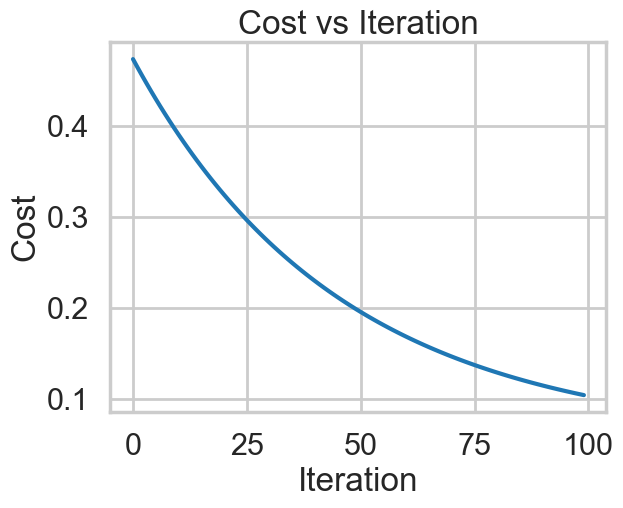

Final weights: [0.00697449 0.47153408 0.3395012  0.08391657]
Predictions for the training set: 
9     -0.212382
18    -0.532328
55     1.005400
75    -0.013802
150    0.553135
dtype: float64
MSE (Mean Squared Error) on the training set: 0.10466829346169398


In [641]:
plot_costs(costs)

final_weights = weights[-1]
y_pred_train = predict(x_train, final_weights)

train_mse = compute_cost(x_train, y_train, final_weights)
    
print(f"Final weights: {final_weights}")
print(f"Predictions for the training set: \n{y_pred_train[:5]}")
print(f"MSE (Mean Squared Error) on the training set: {train_mse}")

#### Predict the quantitative response y on the test set. Evaluate performance.  Similarly, you can use the MSE cost function defined for the gradient descent. 

In [643]:
x = np.random.rand(100, 4)
y = np.random.rand(100)

alpha = 0.01  
num_iterations = 100  

weights, costs = grad_descent(x_test, y_test, alpha, num_iterations)

Iteration 1/100 - Cost: 0.5830741137860528
Iteration 2/100 - Cost: 0.5700452555582436
Iteration 3/100 - Cost: 0.5573645213811673
Iteration 4/100 - Cost: 0.5450218348868252
Iteration 5/100 - Cost: 0.5330074289209348
Iteration 6/100 - Cost: 0.5213118356731774
Iteration 7/100 - Cost: 0.5099258771305599
Iteration 8/100 - Cost: 0.49884065584314485
Iteration 9/100 - Cost: 0.48804754599175765
Iteration 10/100 - Cost: 0.47753818474763454
Iteration 11/100 - Cost: 0.4673044639143093
Iteration 12/100 - Cost: 0.4573385218423604
Iteration 13/100 - Cost: 0.4476327356079623
Iteration 14/100 - Cost: 0.4381797134464784
Iteration 15/100 - Cost: 0.4289722874326379
Iteration 16/100 - Cost: 0.42000350639911344
Iteration 17/100 - Cost: 0.4112666290855982
Iteration 18/100 - Cost: 0.40275511751073834
Iteration 19/100 - Cost: 0.3944626305595432
Iteration 20/100 - Cost: 0.38638301777913253
Iteration 21/100 - Cost: 0.3785103133759247
Iteration 22/100 - Cost: 0.3708387304076026
Iteration 23/100 - Cost: 0.36336265

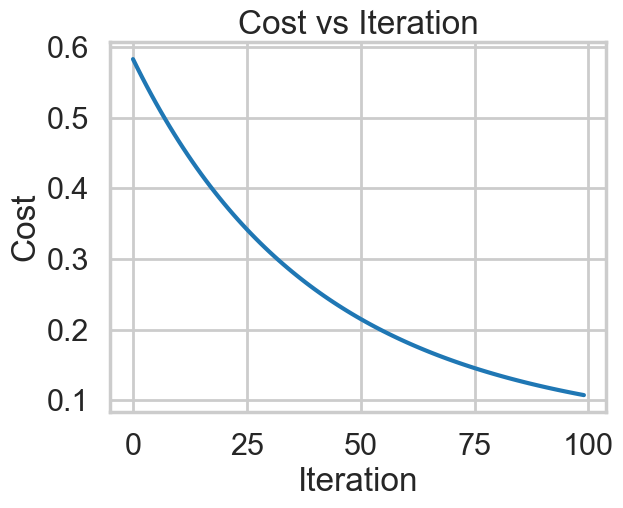

Final weights: [-0.03175682  0.55939338  0.33941371  0.06647947]
Predictions for the test set: 
95     0.333867
15     0.912530
30     1.075096
158   -0.558475
128    0.952879
dtype: float64
MSE (Mean Squared Error) on the test set: 0.10735685294951501


In [645]:
plot_costs(costs)

final_weights = weights[-1]
y_pred_test = predict(x_test, final_weights)

test_mse = compute_cost(x_test, y_test, final_weights)
    
print(f"Final weights: {final_weights}")
print(f"Predictions for the test set: \n{y_pred_test[:5]}")  
print(f"MSE (Mean Squared Error) on the test set: {test_mse}")

#### Note: Since the data is standardized, you might be surprised that the predictions differ from the original data.  In order to revert back a standardized data into the original form, we simply have to equate the previous equation: 

In [574]:
df_copy = std_df.copy()

df_copy.drop('bias', inplace= True, axis = 1)

df_copy['Sales'] = df_copy['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_copy['TV'] = df_copy['TV'] * df['TV'].std() + df['TV'].mean()
df_copy['Radio'] = df_copy['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_copy['Newspaper'] = df_copy['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()

df_copy

,TV,Radio,Newspaper,Sales
0,230.308426,37.836477,69.296979,22.120270
1,44.242678,39.340241,45.136502,10.390910
2,16.874171,45.956803,69.397230,9.288149
3,151.511186,41.345260,58.570128,18.511236
4,180.884712,10.768723,58.469877,12.897183
...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883
196,94.067396,4.853917,8.043654,9.689153
197,177.075176,9.264959,6.339388,12.796932
198,283.942679,42.047016,66.289451,25.528802


### Observe the cost results and analyse.  

#### > Both for the training and testing data, as the iteration increases, the cost decreases. The training data has more cost than the testing data but there is a minimal difference between the two.

# PDF Report

#### 1. What are the optimal weights found by your implemented gradient descent? What are your interpretations regarding the formed linear model?

In [647]:
final_weights = weights[-1]
print("Optimal weights:", final_weights)

def linear_model(X):
    return final_weights[0] + final_weights[1] * X[:, 0] + final_weights[2] * X[:, 1] + final_weights[3] * X[:, 2]

print("\nLinear Model: h0(x) = {:.4f} + {:.4f} * TV + {:.4f} * Radio + {:.4f} * Newspaper".format(*final_weights))

Optimal weights: [-0.03175682  0.55939338  0.33941371  0.06647947]

Linear Model: h0(x) = -0.0318 + 0.5594 * TV + 0.3394 * Radio + 0.0665 * Newspaper


##### > -0.0318 is the value of the dependent variable or 𝜃0 when all of the independent variables are zero.
##### > For every one-unit increase in the TV variable, there is a 0.5594 increase in the dependent variable when holding other variables constant.
##### > For every one-unit increase in the Radio variable, there is a 0.3394 increase in the dependent variable when holding other variables constant.
##### > For every one-unit increase in the Newspaper variable, there is a 0.0665 increase in the dependent variable when holding other variables constant.

#### 2. Provide a scatter plot of for both the train and test set. Is there a trend?  Provide an r2 score (also available in sklearn).  

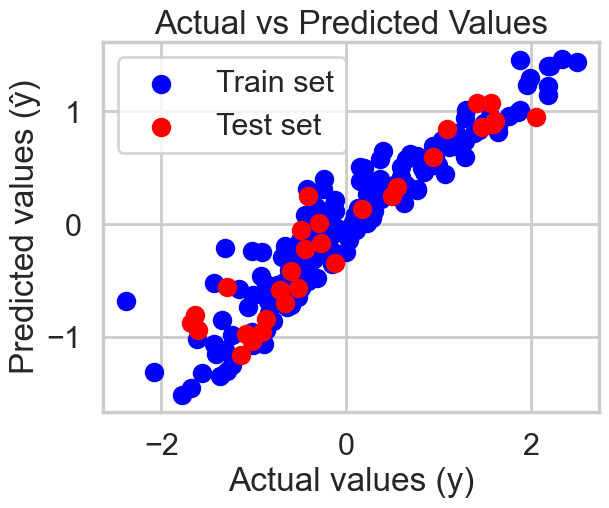

R² score for training set: 0.822501225266512
R² score for test set: 0.8187041617538908


In [650]:
y_pred_train = predict(x_train, final_weights)

plt.scatter(y_train, y_pred_train, color='blue', label='Train set')
plt.scatter(y_test, y_pred_test, color='red', label='Test set')
plt.xlabel("Actual values (y)")
plt.ylabel("Predicted values (ŷ)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R² score for training set: {r2_train}")
print(f"R² score for test set: {r2_test}")

#### 3. What happens to the error, r2 and cost as the number or iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

Iteration 0/50000 - Cost: 0.47359987365509304, R²: 0.019144245606052435
Iteration 1000/50000 - Cost: 0.05133649176495515, R²: 0.8936788285658946
Iteration 2000/50000 - Cost: 0.05133623591148615, R²: 0.8936793584548607
Iteration 3000/50000 - Cost: 0.0513362359093336, R²: 0.8936793584593188
Iteration 4000/50000 - Cost: 0.05133623590933358, R²: 0.8936793584593188
Iteration 5000/50000 - Cost: 0.05133623590933358, R²: 0.8936793584593188
Iteration 6000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 7000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 8000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 9000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 10000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 11000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 12000/50000 - Cost: 0.05133623590933356, R²: 0.8936793584593189
Iteration 13000/50000 - Cost: 0.05133623590933356,

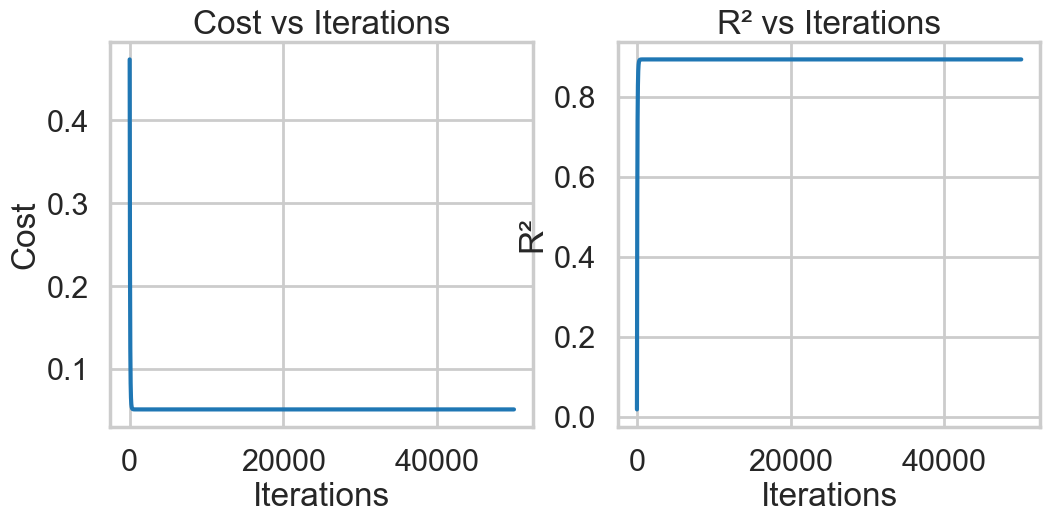

In [652]:
 def grad_descent_again(x, y, alpha, num_iterations):
    theta = initialize_weights_zero()
    weight_history = []
    cost_history = []
    r2_history = []

    for i in range(num_iterations):
        gradient = compute_gradient(x, y, theta)
        theta = update_weights(theta, alpha, gradient)
        cost = compute_cost(x, y, theta)
        r2 = r2_score(y, predict(x, theta))

        weight_history.append(theta.copy())
        cost_history.append(cost)
        r2_history.append(r2)
        
        if i % 1000 == 0:
            print(f"Iteration {i}/{num_iterations} - Cost: {cost}, R²: {r2}")

    return np.array(weight_history), np.array(cost_history), np.array(r2_history)

weights, costs, r2_values = grad_descent_again(x_train, y_train, alpha, 50000)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.subplot(1, 2, 2)
plt.plot(r2_values)
plt.title("R² vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("R²")
plt.show()

#### 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate.  The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT.  Provide your analysis. 

Iteration 0/1000 - Cost: 0.3940318638765729, R²: 0.18393470396198675
Iteration 0/1000 - Cost: 0.47359987365509304, R²: 0.019144245606052435
Iteration 0/1000 - Cost: 0.4820348031960744, R²: 0.001674964809317503
Iteration 0/1000 - Cost: 0.48288307743580383, R²: -8.186561996748054e-05
Iteration 0/1000 - Cost: 0.3158187471748027, R²: 0.34591909174053215


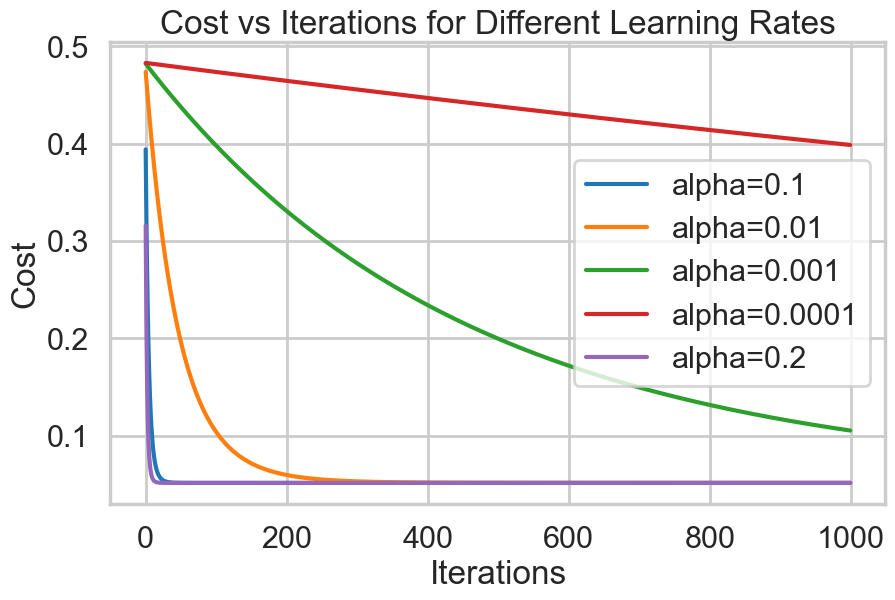

In [654]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    _, costs, _ = grad_descent_again(x_train, y_train, lr, 1000)
    plt.plot(costs, label=f'alpha={lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Different Learning Rates')
plt.legend()
plt.show()

#### 5. Is there a relationship on the learning rate and the number of iterations?

##### > As the learning rate increases, the cost decreases. The minimum can be exceeded at times, resulting in oscillations or divergence.

##### > A lower learning rate (0.0001) can perform more iterations to converge but it results in a smoother descent.

#### 6. Compare the results with the results of ordinary least squares function.

In [656]:
x = sm.add_constant(x_train)

result = sm.OLS(y_train, x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     465.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.58e-80
Time:                        22:40:54   Log-Likelihood:                -47.742
No. Observations:                 170   AIC:                             103.5
Df Residuals:                     166   BIC:                             116.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bias           0.0004      0.025      0.018      0.9

#### > The R^2 in the ordinary lease square function is much higher coompared to the R^2 in the different learning rates. There is a bit big difference between them. It means that there is a small difference between the observed data and the fitted value.